In [14]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as adjust
import PIL
from PIL import Image
import matplotlib

import Loading_imgs
import Models
import Data_pre_processing

### Loading images

In [15]:
test_imgs_orignal = Loading_imgs.loading_imgs_without_downsample('dataset/test')
test_imgs = Loading_imgs.loading_imgs('dataset/test')

### Data Pre-processing

In [16]:
to_Tensor = transforms.ToTensor()
to_pil_image = transforms.ToPILImage()
test_length, weight, height = len(test_imgs), test_imgs[0][0].shape[1], test_imgs[0][0].shape[2]

np.random.seed(0)
test_parameter, test_parameter_T = Data_pre_processing.parameter_create(test_length)
test_imgs_adjusted = Data_pre_processing.parameter_adjust_loop(test_imgs, test_parameter, weight, height)
#create testset
test_imgs_mixed = Data_pre_processing.dataset_preprocessing(test_imgs_adjusted, test_parameter_T)

testloader_mixed = torch.utils.data.DataLoader(test_imgs_mixed, 
                                          batch_size = 1,
                                          shuffle = False, num_workers = 2)

### Testing function

In [17]:
num_parameter = 3

def evaluating_results(testloader, net):
    # Evaluating the results
    loss_array, output_array, label_array = [], [], []
    loss_array = np.array(loss_array)
    output_array, label_array = np.copy(loss_array), np.copy(loss_array)
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        outputs = net.forward(inputs)
        loss = criterion(outputs, labels)
        loss_array = np.append(loss_array,loss.data.numpy())
        output_array = np.append(output_array,outputs.data.numpy())
        label_array = np.append(label_array,labels.numpy())

    output_array = output_array.reshape(-1, num_parameter)
    label_array = label_array.reshape(-1, num_parameter)
    return output_array, loss_array, label_array

### Models importing

In [18]:
net_3_layer_conv3 = Models.Net_3_layer(kernel = 3)
net_3_layer_conv5 = Models.Net_3_layer(kernel = 5)
net_5_layer_conv3 = Models.Net_5_layer(kernel = 3)
net_5_layer_conv5 = Models.Net_5_layer(kernel = 5)
net_7_layer_conv5 = Models.Net_7_layer(kernel = 5)
net_9_layer_conv5 = Models.Net_9_layer(kernel = 5)

net_3_layer_conv3.load_state_dict(torch.load('checkpoints/03model_3_layer_conv3.pt'))
net_3_layer_conv5.load_state_dict(torch.load('checkpoints/04model_3_layer_conv5.pt'))
net_5_layer_conv3.load_state_dict(torch.load('checkpoints/05model_5_layer_conv3.pt'))
net_5_layer_conv5.load_state_dict(torch.load('checkpoints/06model_5_layer_conv5.pt'))
net_7_layer_conv5.load_state_dict(torch.load('checkpoints/07model_7_layer_conv5.pt'))
net_9_layer_conv5.load_state_dict(torch.load('checkpoints/08model_9_layer_conv5.pt'))


<All keys matched successfully>

### Model Testing

In [19]:
#Output predicted parameters
criterion = nn.MSELoss()

outputs_3_layer_conv3, loss_mixed_3_layer_conv3, labels_3_layer_conv3 = evaluating_results(testloader_mixed, net_3_layer_conv3)
outputs_3_layer_conv5, loss_mixed_3_layer_conv5, labels_3_layer_conv5 = evaluating_results(testloader_mixed, net_3_layer_conv5)
outputs_5_layer_conv3, loss_mixed_5_layer_conv3, labels_5_layer_conv3 = evaluating_results(testloader_mixed, net_5_layer_conv3)
outputs_5_layer_conv5, loss_mixed_5_layer_conv5, labels_5_layer_conv5 = evaluating_results(testloader_mixed, net_5_layer_conv5)
outputs_7_layer_conv5, loss_mixed_7_layer_conv5, labels_7_layer_conv5 = evaluating_results(testloader_mixed, net_7_layer_conv5)
outputs_9_layer_conv5, loss_mixed_9_layer_conv5, labels_9_layer_conv5 = evaluating_results(testloader_mixed, net_9_layer_conv5)


0.005465836124876659


Text(0,0.5,'loss')

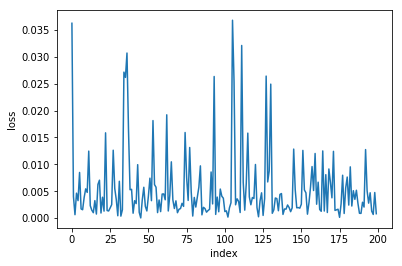

In [20]:
print(loss_mixed_9_layer_conv5.mean())
plt.plot(loss_mixed_9_layer_conv5)
plt.xlabel('index')
plt.ylabel('loss')

Text(0,0.5,'brightness')

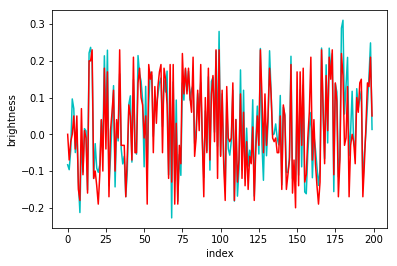

In [21]:
plt.plot(outputs_9_layer_conv5[:, 0], color= 'c')
plt.plot(labels_9_layer_conv5[:, 0], color= 'r')
plt.xlabel('index')
plt.ylabel('brightness')

Text(0,0.5,'contrast')

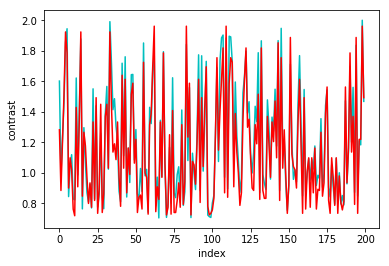

In [22]:
plt.plot(outputs_9_layer_conv5[:, 1], color= 'c')
plt.plot(labels_9_layer_conv5[:, 1], color= 'r')
plt.xlabel('index')
plt.ylabel('contrast')

Text(0,0.5,'hue')

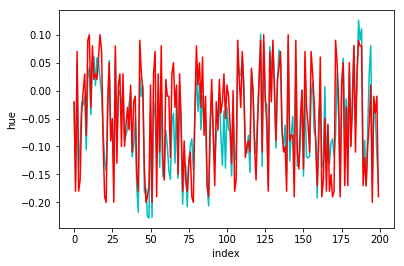

In [23]:
plt.plot(outputs_9_layer_conv5[:, 2], color= 'c')
plt.plot(labels_9_layer_conv5[:, 2], color= 'r')
plt.xlabel('index')
plt.ylabel('hue')

tensor([-0.0415,  0.8656,  0.0312])
[-0.1         0.81967211  0.05      ]


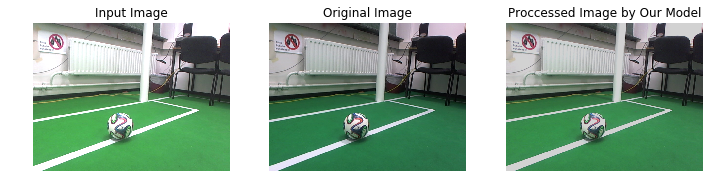

In [25]:
j = 23
out = net_9_layer_conv5.forward(test_imgs_mixed[j][0].unsqueeze(0))
out = out.squeeze().detach()
print(out)
print(labels_9_layer_conv5[j])

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.title.set_text('Input Image')

ax2.title.set_text('Original Image')
ax3.title.set_text('Proccessed Image by Our Model')



#input image
ax1.axis('off')
ax1.imshow(Data_pre_processing.parameter_adjust(test_imgs_orignal[j][0], test_parameter[j]).permute(1,2,0))
#original image
ax2.axis('off')
ax2.imshow(test_imgs_orignal[j][0].permute(1, 2,0))
#output image
ax3.axis('off')
outimg = Data_pre_processing.parameter_adjust(Data_pre_processing.parameter_adjust(test_imgs_orignal[j][0], test_parameter[j]), out)
ax3.imshow(outimg.permute(1,2,0))

## Saving Output images

In [12]:
def optimize_original_imgs(imgs, parameters):
    l = torch.zeros((len(parameters),3, imgs.shape[2], imgs.shape[3]))
    for i in range(len(parameters)):
        l[i] = Data_pre_processing.parameter_adjust(imgs[i], parameters[i])
    
    return l

def save_images(imgs, root):
    for i in range(imgs.shape[0]):
        new_img = to_pil_image(imgs[i])
        if i < 10:
            new_root = root + '0' + str(i) + '.png'
        else:
            new_root = root + str(i) + '.png'
        new_img.save(new_root)

If you want to create and save images, run the next cell

In [13]:

# #create images
# original_samples = Data_pre_processing.parameter_adjust_loop(test_imgs_orignal, test_parameter, weight=600, height = 800)

# output_samples_3_layer_conv3 = optimize_original_imgs(original_samples, outputs_3_layer_conv3)
# output_samples_3_layer_conv5 = optimize_original_imgs(original_samples, outputs_3_layer_conv5)
# output_samples_5_layer_conv3 = optimize_original_imgs(original_samples, outputs_5_layer_conv3)
# output_samples_5_layer_conv5 = optimize_original_imgs(original_samples, outputs_5_layer_conv5)
# output_samples_7_layer_conv5 = optimize_original_imgs(original_samples, outputs_7_layer_conv5)
# output_samples_9_layer_conv5 = optimize_original_imgs(original_samples, outputs_9_layer_conv5)

# #saving outputs
# save_images(original_samples, 'save_imgs/bad_imgs/bad_imgs_')
# save_images(output_samples_3_layer_conv3, 'save_imgs/outputs_3_layer_conv3/outputs_3_layer_conv3_')
# save_images(output_samples_3_layer_conv5, 'save_imgs/outputs_3_layer_conv5/outputs_3_layer_conv5_')
# save_images(output_samples_5_layer_conv3, 'save_imgs/outputs_5_layer_conv3/outputs_5_layer_conv3_')
# save_images(output_samples_5_layer_conv5, 'save_imgs/outputs_5_layer_conv5/outputs_5_layer_conv5_')
# save_images(output_samples_7_layer_conv5, 'save_imgs/outputs_7_layer_conv5/outputs_7_layer_conv5_')
# save_images(output_samples_9_layer_conv5, 'save_imgs/outputs_9_layer_conv5/outputs_9_layer_conv5_')